# RV fitting challenge data set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy
from astropy.timeseries import LombScargle
import scipy.optimize as sopt
from scipy.optimize import minimize

# Load our software package
import sys
sys.path.append('..')

from RedNoiseFALs import RedNoiseFALs

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

### Read the dataset using pandas


This is the data set (named as system 12) generated by <a href="https://ui.adsabs.harvard.edu/abs/2016A%26A...593A...5D/abstract">Dumusque (2016)</a> for the RV fitting challenge <a href="https://ui.adsabs.harvard.edu/abs/2017A%26A...598A.133D/abstract">Dumusque et al. (2016)</a>. We use the radial velocity time series from this data set to calculate the false alarms, these calculations are featured in section 4.2 of our paper.

In [2]:
data = pd.read_csv('RVchallenge_sys12.txt',delim_whitespace=True, \
                   comment='#')
data

,BJD,RV,e_RV,FWHM,e_FWHM,BisSpan,e_BisSpan,logRHK,e_logRHK,RVo+g,...,RVInstn,FWHMo+g,FWHMact,FWHMInstn,BiSpano+g,BisSpanact,BisSpanInstn,logRHKo+g,logRHKact,logRHKInstn
0,55000.000000,-0.004616,0.000740,-0.019283,0.001740,-0.000741,0.001481,-4.987759,0.0005,-0.000646,...,0.000210,-0.001852,0.010893,-0.001541,-0.000230,0.000548,0.002718,-0.002020,-0.004986,0.000261
1,55000.976043,-0.006437,0.000694,-0.018611,0.001630,-0.001419,0.001388,-4.991668,0.0003,-0.001219,...,0.000295,-0.003520,0.010912,0.000780,-0.000607,0.001123,0.001842,-0.004879,-0.004987,0.000211
2,55001.975759,-0.006191,0.000687,-0.021654,0.001614,-0.004053,0.001374,-4.994924,0.0003,-0.001936,...,0.001241,-0.005877,0.010413,0.000593,-0.001216,0.001497,-0.000557,-0.007359,-0.004988,0.000435
3,55002.983180,-0.005659,0.000687,-0.015483,0.001614,-0.002436,0.001374,-4.986772,0.0003,0.000466,...,0.000061,0.001635,0.009646,0.000019,0.000002,0.001862,-0.000523,0.001963,-0.004989,0.000266
4,55003.967771,-0.009256,0.000702,-0.020094,0.001650,-0.003471,0.001404,-4.994177,0.0004,-0.001564,...,-0.000233,-0.001859,0.008830,-0.000282,-0.000442,0.002132,-0.001384,-0.004444,-0.004990,0.000267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,56202.558639,0.004138,0.000635,0.017220,0.001492,0.002006,0.001269,-4.943936,0.0002,0.001176,...,-0.000213,0.004337,0.040411,-0.000745,0.000467,0.006566,-0.001250,0.004685,-0.004949,0.000379
429,56202.591648,0.000554,0.000625,0.009113,0.001469,0.002162,0.001250,-4.954860,0.0002,-0.001515,...,-0.001125,-0.001693,0.040411,-0.002821,-0.001757,0.006566,0.001130,-0.006183,-0.004949,0.000324
430,56203.565251,0.002233,0.000628,0.016669,0.001476,0.003585,0.001256,-4.945168,0.0003,-0.000100,...,-0.001533,0.002005,0.042108,-0.000661,0.000003,0.006269,0.001090,0.000475,-0.004946,0.000357
431,56203.620906,0.006835,0.000625,0.021046,0.001469,0.005412,0.001250,-4.937679,0.0003,0.002378,...,0.000646,0.006552,0.042108,-0.000831,0.001733,0.006269,0.001188,0.008025,-0.004946,0.000297


In [3]:
time = np.array(data['BJD'])
obs = np.array(data['RV'])
eobs = np.array(data['e_RV'])

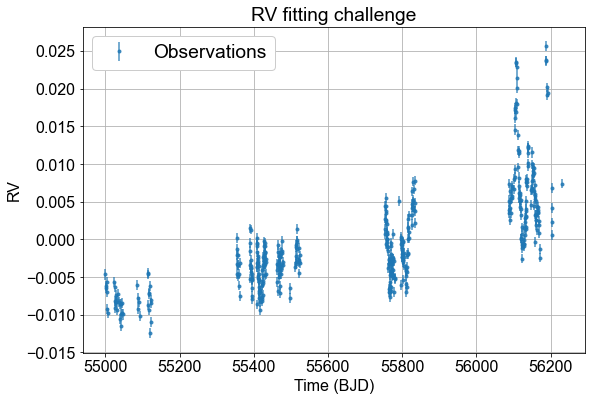

In [4]:
plt.figure(figsize=(9,6))
plt.title(r"RV fitting challenge")
plt.errorbar(time, obs, yerr=eobs, fmt='.', ls=None, alpha=0.8,label= "Observations")
plt.xlabel("Time (BJD)")
plt.ylabel(r'RV')
plt.tick_params(axis='y')
plt.grid(axis="both")
plt.legend(loc='upper left',fontsize='large', ncol=1, facecolor='white', framealpha=1)

### Calculate the LombScargle periodogram 

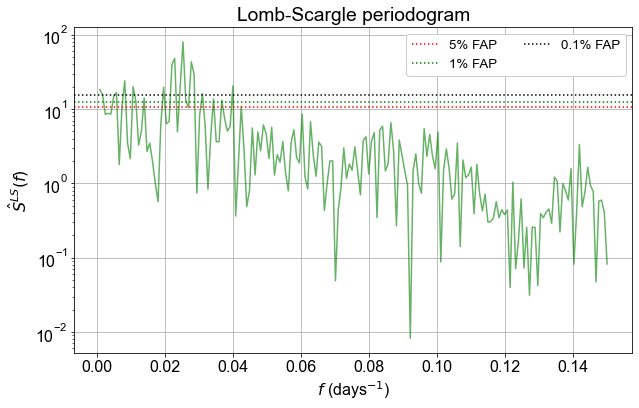

In [5]:
fmax=0.15
rnf = RedNoiseFALs(time,obs,eobs,fmax)

### Fitting the noise models

#### 1. AR(1) fit

----------------------- AR(1) FITTING RESULTS -------------------
Optimization terminated successfully.
Phi = 0.84
Sigma = 0.70
Whittle negative log-likelihood = 373.83


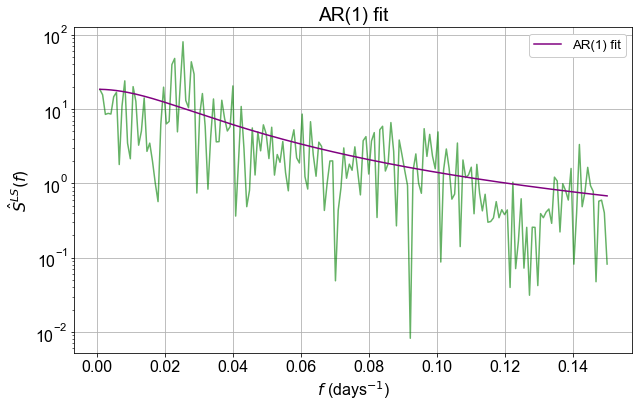

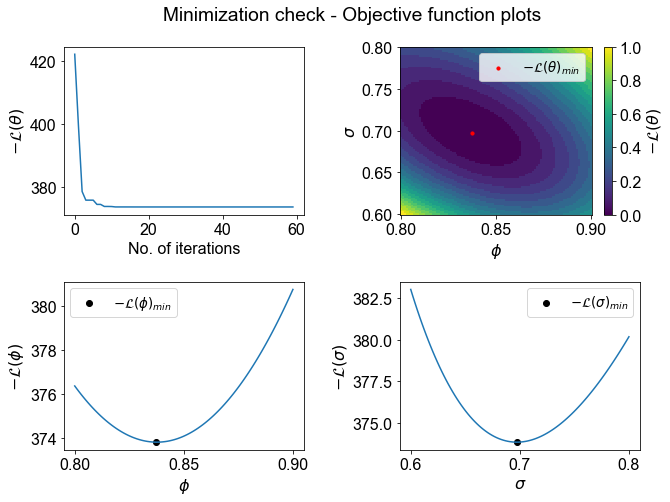

In [6]:
ar = rnf.ar1_fit([0.6,0.7],plot_limits=[(0.8,0.9),(0.6,0.8)])


#### 2. Power law fit

----------------------- POWER LAW FITTING RESULTS -------------------
Optimization terminated successfully.
Slope = -1.22
Intercept = -1.02
Whittle negative log-likelihood = 393.56


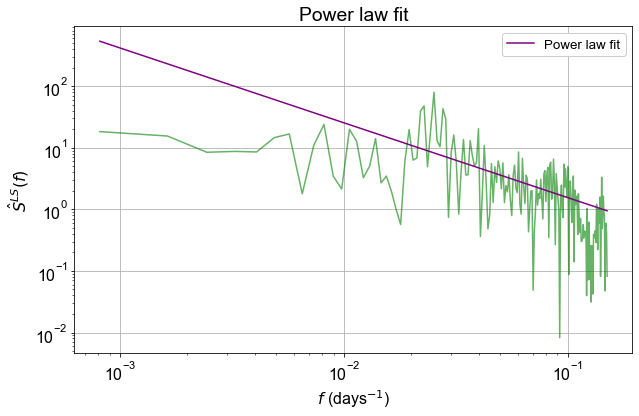

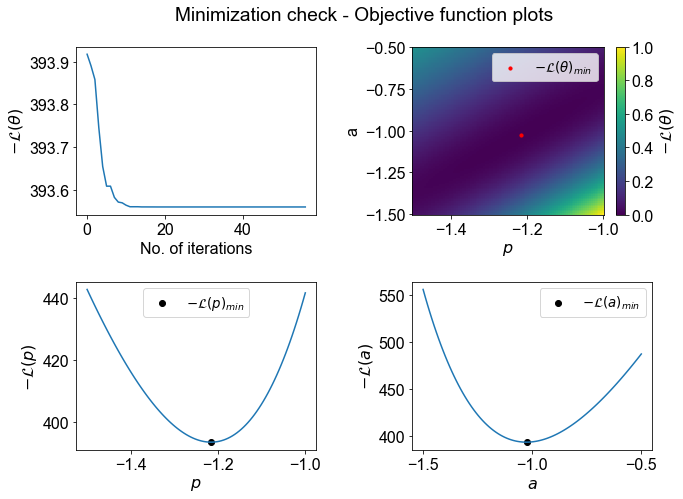

In [7]:
pl = rnf.pl_fit([-1.2,-0.9],plot_limits=[(-1.5,-1),(-1.5,-0.5)])


#### 3. White noise fit

----------------------- WHITE NOISE FITTING RESULTS -------------------
Optimization terminated successfully.
Power of white noise = 4.79
Whittle negative log-likelihood = 472.11


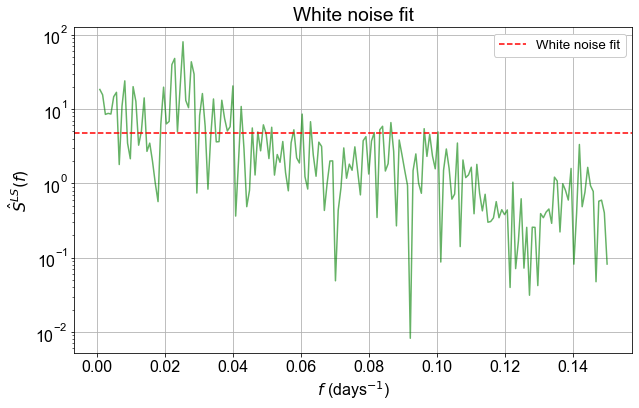

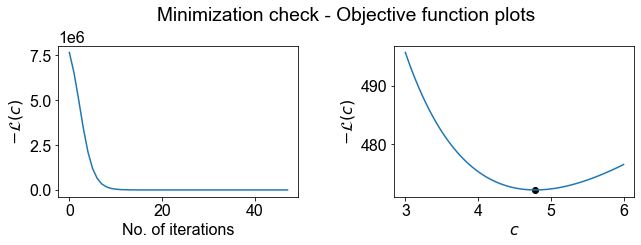

In [8]:
wn = rnf.wn_fit(10**-4,plot_limits=[(3,6)])


### Choosing the best model type

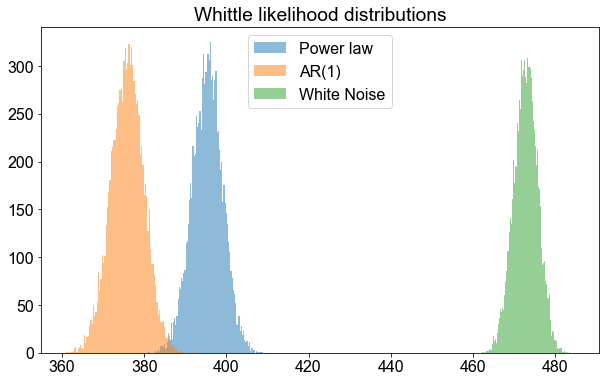

In [9]:


dist= rnf.gen_distributions(n_bootstrap=10000,save_file="Demo_RV_data.txt")



### Calculating the FALs

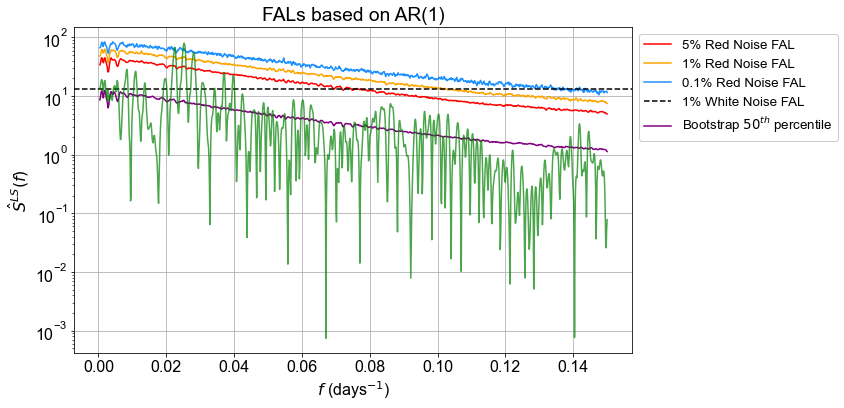

In [10]:
# We get the dist of parameters to calculate the FALs

phi = dist[5]
sigma = dist[6]

fals_ar1 = rnf.fal_ar1(phi,sigma)